In [1]:
from tensorflow.keras.layers import Dense,Flatten,Conv2D,Lambda
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications import VGG16,VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
IMAGE_SIZE=[224,224]

train_path=("/content/drive/MyDrive/Maleria_Dataset/Train")
valid_path=("/content/drive/MyDrive/Maleria_Dataset/Test")

In [4]:
vgg19=VGG19(input_shape=IMAGE_SIZE+[3],weights="imagenet",include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [8]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
for layer in vgg19.layers:
  layer.trainable=False

In [10]:
folder=glob("/content/drive/MyDrive/Maleria_Dataset/Train/*")
len(folder)

2

In [11]:
x=Flatten()(vgg19.output)
prediction=Dense(len(folder),activation="softmax")(x)
model=Model(inputs=vgg19.input,outputs=prediction)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=.2,
                                 rotation_range=.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/Maleria_Dataset/Train",batch_size=32,target_size=(224,224),
                                               class_mode="categorical")
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/Maleria_Dataset/Test",batch_size=32,class_mode="categorical",
                                          target_size=(224,224))

Found 416 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
transfer_vgg19=model.fit_generator(training_set,validation_data=test_set,epochs=20,
                         steps_per_epoch=len(training_set),validation_steps=len(test_set))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
13/13 [==============================] - 125s 9s/step - loss: 1.6956 - accuracy: 0.5081 - val_loss: 0.8117 - val_accuracy: 0.6791
Epoch 2/20
13/13 [==============================] - 6s 436ms/step - loss: 0.7055 - accuracy: 0.6253 - val_loss: 0.5943 - val_accuracy: 0.6567
Epoch 3/20
13/13 [==============================] - 6s 438ms/step - loss: 0.3852 - accuracy: 0.8511 - val_loss: 0.5020 - val_accuracy: 0.7687
Epoch 4/20
13/13 [==============================] - 6s 440ms/step - loss: 0.2899 - accuracy: 0.9127 - val_loss: 0.4252 - val_accuracy: 0.7910
Epoch 5/20
13/13 [==============================] - 6s 436ms/step - loss: 0.2563 - accuracy: 0.9225 - val_loss: 0.4355 - val_accuracy: 0.7985
Epoch 6/20
13/13 [==============================] - 6s 436ms/step - loss: 0.2529 - accuracy: 0.9195 - val_loss: 0.4248 - val_accuracy: 0.7612
Epoch 7/20
13/13 [==============================] - 6s 436ms/step - loss: 0.2876 - accuracy: 0.8788 - val_loss: 0.4267 - val_accuracy: 0.8134
Epoch 8

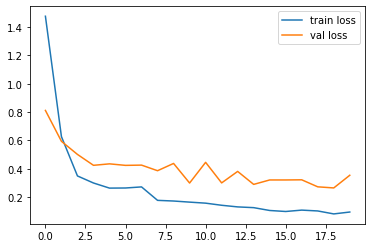

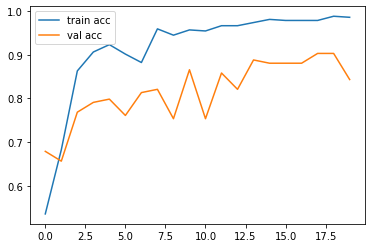

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(transfer_vgg19.history['loss'], label='train loss')
plt.plot(transfer_vgg19.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg19.history['accuracy'], label='train acc')
plt.plot(transfer_vgg19.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
vgg16=VGG16(input_shape=IMAGE_SIZE+[3],include_top=False,weights="imagenet")

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
z=Flatten()(vgg16.output)
prediction_vgg16=Dense(len(folder),activation="softmax")(z)
model_vgg16=Model(inputs=vgg16.input,outputs=prediction_vgg16)

In [ ]:
model_vgg16.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model_vgg16.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
transfer_vgg16=model_vgg16.fit(training_set,validation_data=test_set,epochs=50,
                               steps_per_epoch=len(training_set),validation_steps=len(test_set))

Epoch 1/50
13/13 [==============================] - 8s 582ms/step - loss: 1.3945 - accuracy: 0.5237 - val_loss: 0.7567 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 7s 544ms/step - loss: 0.5606 - accuracy: 0.7168 - val_loss: 0.6198 - val_accuracy: 0.6866
Epoch 3/50
13/13 [==============================] - 7s 546ms/step - loss: 0.3340 - accuracy: 0.8592 - val_loss: 0.4059 - val_accuracy: 0.7910
Epoch 4/50
13/13 [==============================] - 7s 536ms/step - loss: 0.2502 - accuracy: 0.9312 - val_loss: 0.4327 - val_accuracy: 0.8060
Epoch 5/50
13/13 [==============================] - 7s 550ms/step - loss: 0.2343 - accuracy: 0.9282 - val_loss: 0.3414 - val_accuracy: 0.8284
Epoch 6/50
13/13 [==============================] - 7s 557ms/step - loss: 0.1974 - accuracy: 0.9438 - val_loss: 0.3503 - val_accuracy: 0.8358
Epoch 7/50
13/13 [==============================] - 7s 536ms/step - loss: 0.1587 - accuracy: 0.9709 - val_loss: 0.3162 - val_accuracy: 0.8582
Epoch 

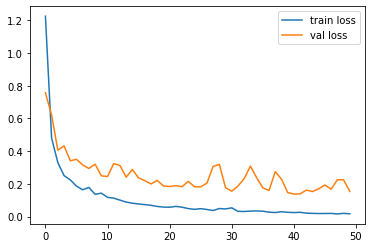

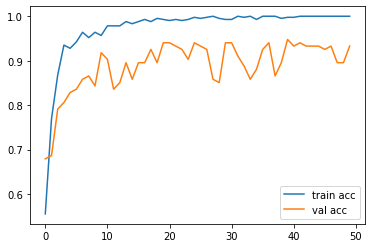

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(transfer_vgg16.history['loss'], label='train loss')
plt.plot(transfer_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg16.history['accuracy'], label='train acc')
plt.plot(transfer_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from tensorflow.keras.models import load_model
#model_vgg16.save("model_vgg16.h5")
model.save("model_vgg19.h5")

In [19]:
y_pred_vgg19=model.predict(test_set)

In [21]:
y_pred_vgg19 ## this the probabilities of the 2 class , first column is parasite and 2nd one is non infected 

array([[9.87392485e-01, 1.26074729e-02],
       [9.99804080e-01, 1.95999426e-04],
       [4.64004964e-01, 5.35995007e-01],
       [9.97315228e-01, 2.68473406e-03],
       [1.17085218e-01, 8.82914782e-01],
       [3.47908646e-01, 6.52091384e-01],
       [9.99552667e-01, 4.47275524e-04],
       [9.57812250e-01, 4.21877131e-02],
       [9.71451163e-01, 2.85488740e-02],
       [9.98707891e-01, 1.29215640e-03],
       [8.03701803e-02, 9.19629872e-01],
       [6.84150532e-02, 9.31585014e-01],
       [9.73622382e-01, 2.63776146e-02],
       [9.16219205e-02, 9.08378065e-01],
       [8.46919641e-02, 9.15308058e-01],
       [9.98309493e-01, 1.69048272e-03],
       [9.99986291e-01, 1.36729286e-05],
       [6.32418394e-01, 3.67581606e-01],
       [8.85564208e-01, 1.14435770e-01],
       [2.77455281e-02, 9.72254515e-01],
       [9.79809523e-01, 2.01904103e-02],
       [7.92514503e-01, 2.07485557e-01],
       [2.59959400e-02, 9.74004030e-01],
       [1.07664168e-01, 8.92335832e-01],
       [6.261256

In [22]:
import numpy as np
y_pred_vgg19=np.argmax(y_pred_vgg19,axis=1)

In [23]:
y_pred_vgg19

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0])

In [24]:
## Next step is to read the image wheather it us infected or not 

from tensorflow.keras.preprocessing import image 
from tensorflow.keras.models import load_model

In [25]:
model=load_model("model_vgg19.h5")

In [26]:
img=image.load_img('/content/drive/MyDrive/Maleria_Dataset/Test/Uninfected/2.png',
                   target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[8.245997e-06, 9.999918e-01]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data))
a

1

In [33]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
